# Задание 1

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

np.random.seed(0)

In [76]:
from sklearn.base import BaseEstimator
class LinearRegression(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        
        self.epsilon = epsilon 
        self.max_steps = max_steps 
        self.w0 = w0 #
        self.alpha = alpha 
        self.w = None
        self.w_history = []
    
    def fit(self, X, y):
        
        l, d = X.shape

        if self.w0 is None: 
            self.w0 = np.zeros(d)

        self.w = self.w0

        for step in range(self.max_steps):
            self.w_history.append(self.w)

            w_new = self.w - self.alpha * self.calc_gradient(X, y)

            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
          
            self.w = w_new
        
        return self
    
    def predict(self, X):
        
        if self.w is None:
            raise Exception('Not trained yet')
        
        l, d = X.shape

        y_pred = []

        for i in range(l):
            y_pred.append(np.dot(X[i], self.w))

        return np.array(y_pred)
    
    def calc_gradient(self, X, y):
        
        l, d = X.shape
        gradient = []
        
        for j in range(d):
            dQ = 0
            for i in range(l):
                dQ += (2/l) * X[i][j] * (np.dot(X[i], self.w) - y[i])
            gradient.append(dQ)

        return np.array(gradient)

In [77]:
def plot_gd(X, y, w_history):
    # compute level set
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(13, 9))
    plt.title('GD trajectory')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((-2.1, 2.1))
    plt.ylim((-2.1, 2.1))

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=10), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    w_list = np.array(lr.w_history)
    plt.scatter(w_true[0], w_true[1], c='r', marker='*')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.show()

In [78]:
n_features = 2
n_objects = 300
num_steps = 100


np.random.seed(1)
w_true = np.random.normal(0, 0.1, size=(n_features, ))
w_0 = np.random.uniform(-2, 2, (n_features))

X = np.random.uniform(-5, 5, (n_objects, n_features))
y = np.dot(X, w_true) + np.random.normal(0, 1, (n_objects))

<ipython-input-77-fd257d33cffc>:20: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


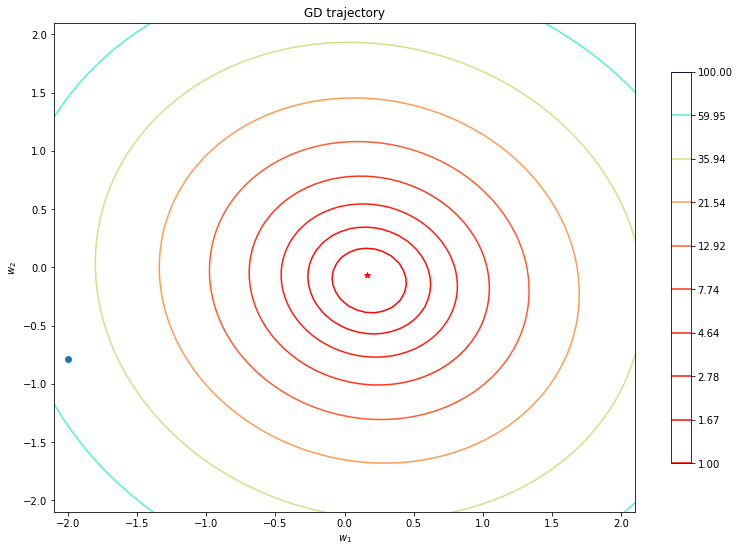

In [79]:
lr = LinearRegression(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

<ipython-input-84-7841d72d2b41>:11: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


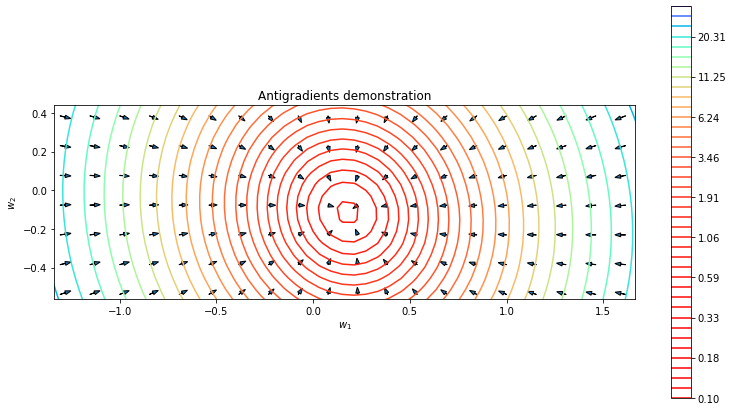

In [84]:
def plot_gd(X, y, w_history):
    A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    A_mini, B_mini = np.meshgrid(np.linspace(-3, 3, 40), np.linspace(-3, 3, 40))
    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2 * 1e-3 * np.dot(X.T, np.dot(X, w_tmp) - y) / y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)
plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .5))
plt.gca().set_aspect('equal')
plt.show()

In [85]:
lr = LinearRegression(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)

In [88]:
np.random.seed(random_seed)
batch_size = 10
w = w_0.copy()
w_history_list = [w.copy()]
lr = 1e-2
for i in range(num_steps):
    sample_indices = np.random.randint(0, n_objects,size = batch_size)
    w -= (step_size * 2 * X[sample_indices,:].T @ (X[sample_indices,:] @ w - y[sample_indices]))/y[sample_indices].size 
    w_history_list.append(w.copy())
w_history_list = np.array(w_history_list)

<ipython-input-89-c0d1a8b9af95>:16: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


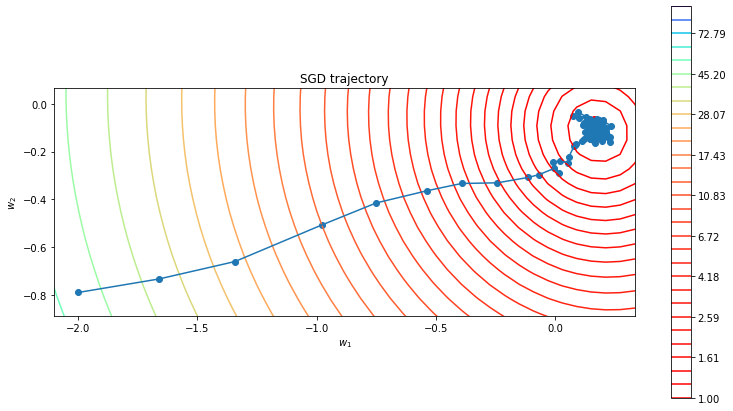

In [89]:
def plot_gd(X, y, w_history):
    A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))
plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_history_list[:, 0].min() - 0.1, w_history_list[:, 0].max() + 0.1))
plt.ylim((w_history_list[:, 1].min() - 0.1, w_history_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_history_list[:, 0], w_history_list[:, 1])
plt.plot(w_history_list[:, 0], w_history_list[:, 1])
plt.show()

In [90]:
lr = LinearRegression(w0=w_0)
lr.fit(X, y)

plot_gd(X, y, lr.w_history)